In [108]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

%run db_connection.ipynb

In [6]:
df = pd.read_sql(sql_query, con= engine)

In [7]:
df.shape

(150001, 55)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 55 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   Bearer Id                                 149010 non-null  float64
 1   Start                                     150000 non-null  object 
 2   Start ms                                  150000 non-null  float64
 3   End                                       150000 non-null  object 
 4   End ms                                    150000 non-null  float64
 5   Dur. (ms)                                 150000 non-null  float64
 6   IMSI                                      149431 non-null  float64
 7   MSISDN/Number                             148935 non-null  float64
 8   IMEI                                      149429 non-null  float64
 9   Last Location Name                        148848 non-null  object 
 10  Avg RTT DL (ms)     

# Identifying the top 10 handsets used by the customers

In [9]:
df_headset_type = df['Handset Type'].value_counts(ascending=False)
df_headset_type.iloc[:10]

Handset Type
Huawei B528S-23A                19752
Apple iPhone 6S (A1688)          9419
Apple iPhone 6 (A1586)           9023
undefined                        8987
Apple iPhone 7 (A1778)           6326
Apple iPhone Se (A1723)          5187
Apple iPhone 8 (A1905)           4993
Apple iPhone Xr (A2105)          4568
Samsung Galaxy S8 (Sm-G950F)     4520
Apple iPhone X (A1901)           3813
Name: count, dtype: int64

<Axes: title={'center': 'Top 10 Handset Type Widely used by user'}, xlabel='Handset Type'>

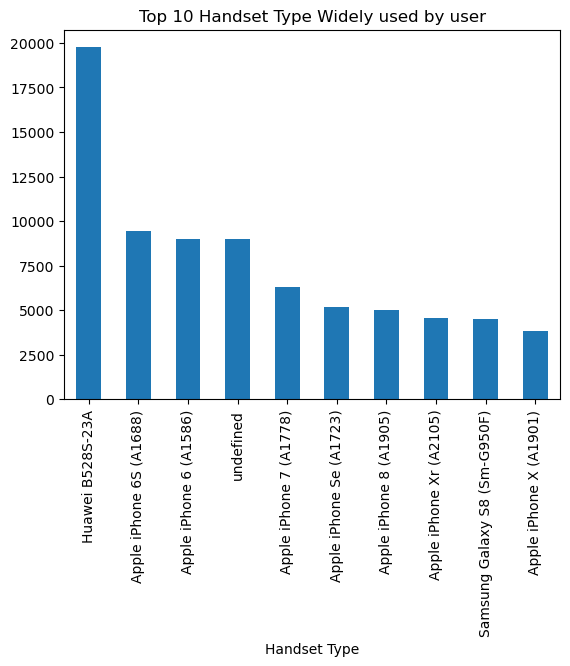

In [10]:
df_headset_type.iloc[:10].plot.bar(x="Total Handset Used", y="Handset Type", title="Top 10 Handset Type Widely used by user")

# Identifying the top 3 handset manufacturers

In [11]:
df_headset_m = df['Handset Manufacturer'].value_counts(ascending=False)
df_headset_m.iloc[:3]

Handset Manufacturer
Apple      59565
Samsung    40839
Huawei     34423
Name: count, dtype: int64

Text(0.5, 1.0, 'Top 3 Handset used by Manufacturer')

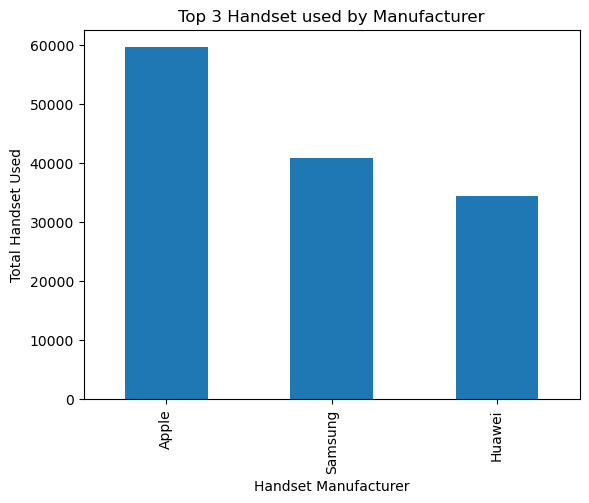

In [12]:
df_headset_m.iloc[:3].plot(kind="bar")
plt.xlabel("Handset Manufacturer")
plt.ylabel("Total Handset Used")
plt.title("Top 3 Handset used by Manufacturer")

# Identifying the top 5 handsets per top 3 handset manufacturer

In [13]:
top_5_headsets =['Huawei B528S-23A', 'Apple iPhone 6S (A1688)','Apple iPhone 6 (A1586)', 'undefined','Apple iPhone 7 (A1778)']
top_3_manufacturers = ['Apple','Samsung', 'Huawei']
top_5_headset_by_top_3_manufac =df[(df['Handset Type'].isin(top_5_headsets)) & (df['Handset Manufacturer'].isin(top_3_manufacturers))]

In [14]:
top5 = top_5_headset_by_top_3_manufac['Handset Type'].value_counts(ascending=False)
top5.iloc[:5]

Handset Type
Huawei B528S-23A           19752
Apple iPhone 6S (A1688)     9419
Apple iPhone 6 (A1586)      9023
Apple iPhone 7 (A1778)      6326
Name: count, dtype: int64

Text(0.5, 1.0, '5 handset per top 3 handset manufacturer')

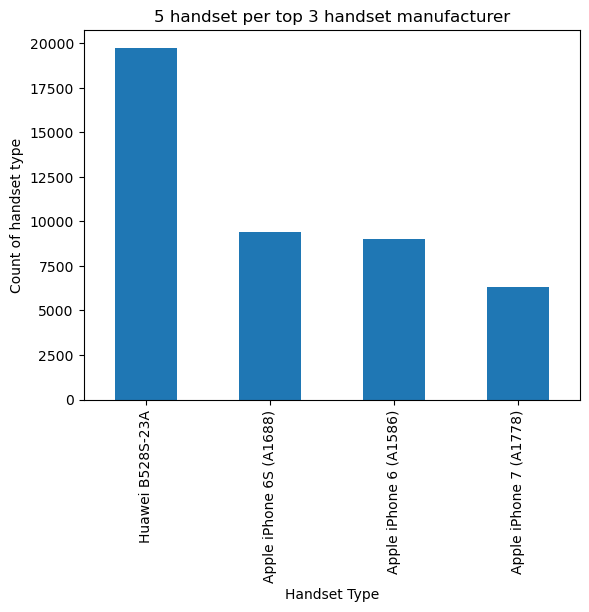

In [15]:
top5.iloc[:5].plot(kind="bar")
plt.xlabel("Handset Type")
plt.ylabel("Count of handset type")
plt.title("5 handset per top 3 handset manufacturer")

In [16]:
df.isnull().sum().sum()

1031392

In [17]:
df.isnull().sum().sort_values(ascending=False)

Nb of sec with 37500B < Vol UL              130254
Nb of sec with 6250B < Vol UL < 37500B      111843
Nb of sec with 125000B < Vol DL              97538
TCP UL Retrans. Vol (Bytes)                  96649
Nb of sec with 31250B < Vol DL < 125000B     93586
Nb of sec with 1250B < Vol UL < 6250B        92894
Nb of sec with 6250B < Vol DL < 31250B       88317
TCP DL Retrans. Vol (Bytes)                  88146
HTTP UL (Bytes)                              81810
HTTP DL (Bytes)                              81474
Avg RTT DL (ms)                              27829
Avg RTT UL (ms)                              27812
Last Location Name                            1153
MSISDN/Number                                 1066
Bearer Id                                      991
Nb of sec with Vol UL < 1250B                  793
UL TP < 10 Kbps (%)                            792
10 Kbps < UL TP < 50 Kbps (%)                  792
50 Kbps < UL TP < 300 Kbps (%)                 792
UL TP > 300 Kbps (%)           

In [18]:
# how many missing values exist or better still what is the % of missing values in the dataset?
def percent_missing(df):
    # Calculate total number of cells in dataframe
    totalCells = np.product(df.shape)

    # Count number of missing values per column
    missingCount = df.isnull().sum()

    # Calculate total number of missing values
    totalMissing = missingCount.sum()

    # Calculate percentage of missing values
    print("The telecom dataset contains", round(((totalMissing/totalCells) * 100), 2), "%", "missing values.")

percent_missing(df)

The telecom dataset contains 12.5 % missing values.


In [19]:
# Total null values in percentage for telecom dataset (%)
df.isnull().sum().sort_values(ascending=False)/150001*100

Nb of sec with 37500B < Vol UL              86.835421
Nb of sec with 6250B < Vol UL < 37500B      74.561503
Nb of sec with 125000B < Vol DL             65.024900
TCP UL Retrans. Vol (Bytes)                 64.432237
Nb of sec with 31250B < Vol DL < 125000B    62.390251
Nb of sec with 1250B < Vol UL < 6250B       61.928920
Nb of sec with 6250B < Vol DL < 31250B      58.877607
TCP DL Retrans. Vol (Bytes)                 58.763608
HTTP UL (Bytes)                             54.539636
HTTP DL (Bytes)                             54.315638
Avg RTT DL (ms)                             18.552543
Avg RTT UL (ms)                             18.541210
Last Location Name                           0.768662
MSISDN/Number                                0.710662
Bearer Id                                    0.660662
Nb of sec with Vol UL < 1250B                0.528663
UL TP < 10 Kbps (%)                          0.527996
10 Kbps < UL TP < 50 Kbps (%)                0.527996
50 Kbps < UL TP < 300 Kbps (

In [20]:
# drop columns with more than 30% missing values
df_clean = df.drop(['Nb of sec with 37500B < Vol UL', 'Nb of sec with 6250B < Vol UL < 37500B', 
                    'Nb of sec with 125000B < Vol DL', 'TCP UL Retrans. Vol (Bytes)', 
                    'Nb of sec with 31250B < Vol DL < 125000B','Nb of sec with 1250B < Vol UL < 6250B',
                    'Nb of sec with 6250B < Vol DL < 31250B','TCP DL Retrans. Vol (Bytes)',
                    'HTTP UL (Bytes)','HTTP DL (Bytes)'], axis=1)
df_clean.shape

(150001, 45)

In [21]:
# fill missing with ffill method for columns

def fix_missing_bymode(df, col):
    df_clean[col] = df_clean[col].mode()[0]
    return df[col]


def fix_missing_bfill(df, col):
    df[col] = df[col].fillna(method='bfill')
    return df[col]

df_clean['Start'] = fix_missing_bymode(df_clean, 'Start')
df_clean['End '] = fix_missing_bymode(df_clean, 'End')
df_clean['Last Location Name'] = fix_missing_bymode(df_clean, 'Last Location Name')
df_clean['Handset Manufacturer'] = fix_missing_bymode(df_clean, 'Handset Manufacturer')
df_clean['Handset Type'] = fix_missing_bymode(df_clean, 'Handset Type')

In [22]:
# Filling all float datatype columns using forward fill method
df_clean.fillna(method='ffill', inplace=True)

In [23]:
# Total of missiong value is 0
df_clean.isnull().sum().sum()

0

In [24]:
# Users’ behavior on those applications by aggregating information's relevant columns
columns = ['Bearer Id','Dur. (ms)', 'Social Media DL (Bytes)','Social Media UL (Bytes)','Google DL (Bytes)',
           'Google UL (Bytes)','Email DL (Bytes)','Email UL (Bytes)','Youtube DL (Bytes)','Youtube UL (Bytes)',
           'Netflix DL (Bytes)','Netflix UL (Bytes)','Gaming DL (Bytes)','Gaming UL (Bytes)','Other DL (Bytes)',
           'Total UL (Bytes)','Total DL (Bytes)']
df_user_aggregation = df_clean[columns]

In [25]:
df_user_aggregation.shape

(150001, 17)

In [26]:
df_user_aggregation.describe()

,Bearer Id,Dur. (ms),Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Total UL (Bytes),Total DL (Bytes)
count,1.500010e+05,1.500010e+05,1.500010e+05,150001.000000,1.500010e+05,1.500010e+05,1.500010e+05,150001.000000,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05
mean,1.013857e+19,1.046085e+05,1.795322e+06,32928.434380,5.750753e+06,2.056542e+06,1.791729e+06,467373.441940,1.163407e+07,1.100941e+07,1.162685e+07,1.100175e+07,4.220447e+08,8.288398e+06,4.211005e+08,4.112113e+07,4.546429e+08
std,2.893197e+18,8.103735e+04,1.035482e+06,19006.178256,3.309097e+06,1.189917e+06,1.035840e+06,269969.307031,6.710569e+06,6.345423e+06,6.725218e+06,6.359490e+06,2.439675e+08,4.782700e+06,2.432050e+08,1.127639e+07,2.441422e+08
min,6.917538e+18,7.142000e+03,1.200000e+01,0.000000,2.070000e+02,3.000000e+00,1.400000e+01,2.000000,5.300000e+01,1.050000e+02,4.200000e+01,3.500000e+01,2.516000e+03,5.900000e+01,3.290000e+03,2.866892e+06,7.114041e+06
25%,7.349883e+18,5.744200e+04,8.991480e+05,16448.000000,2.882393e+06,1.024279e+06,8.927930e+05,233383.000000,5.833501e+06,5.517965e+06,5.777156e+06,5.475981e+06,2.104733e+08,4.128476e+06,2.101869e+08,3.322196e+07,2.431072e+08
50%,7.349883e+18,8.639900e+04,1.794369e+06,32920.000000,5.765829e+06,2.054573e+06,1.793505e+06,466250.000000,1.161602e+07,1.101345e+07,1.164222e+07,1.099638e+07,4.234081e+08,8.291208e+06,4.218030e+08,4.114324e+07,4.558409e+08
75%,1.304243e+19,1.324300e+05,2.694938e+06,49334.000000,8.623552e+06,3.088454e+06,2.689327e+06,700440.000000,1.744852e+07,1.651556e+07,1.747048e+07,1.650727e+07,6.331742e+08,1.243162e+07,6.316918e+08,4.903424e+07,6.657051e+08
max,1.318654e+19,1.859336e+06,3.586064e+06,65870.000000,1.146283e+07,4.121357e+06,3.586146e+06,936418.000000,2.325910e+07,2.201196e+07,2.325919e+07,2.201196e+07,8.434419e+08,1.655879e+07,8.434425e+08,7.833131e+07,9.029696e+08


In [27]:
df_clean.describe()

,Bearer Id,Start ms,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
count,1.500010e+05,150001.000000,150001.000000,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,150001.000000,150001.000000,150001.000000,...,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05
mean,1.013857e+19,499.189512,498.799735,1.046085e+05,2.082016e+14,4.182447e+10,4.846567e+13,103.663656,17.152266,13299.957487,...,1.163407e+07,1.100941e+07,1.162685e+07,1.100175e+07,4.220447e+08,8.288398e+06,4.211005e+08,8.264799e+06,4.112113e+07,4.546429e+08
std,2.893197e+18,288.611320,288.097034,8.103735e+04,2.144741e+10,2.438731e+12,2.241249e+13,576.739786,84.585304,23971.823106,...,6.710569e+06,6.345423e+06,6.725218e+06,6.359490e+06,2.439675e+08,4.782700e+06,2.432050e+08,4.769004e+06,1.127639e+07,2.441422e+08
min,6.917538e+18,0.000000,0.000000,7.142000e+03,2.040471e+14,3.360100e+10,4.400152e+11,0.000000,0.000000,0.000000,...,5.300000e+01,1.050000e+02,4.200000e+01,3.500000e+01,2.516000e+03,5.900000e+01,3.290000e+03,1.480000e+02,2.866892e+06,7.114041e+06
25%,7.349883e+18,250.000000,251.000000,5.744200e+04,2.082014e+14,3.365128e+10,3.546071e+13,31.000000,2.000000,43.000000,...,5.833501e+06,5.517965e+06,5.777156e+06,5.475981e+06,2.104733e+08,4.128476e+06,2.101869e+08,4.145943e+06,3.322196e+07,2.431072e+08
50%,7.349883e+18,499.000000,500.000000,8.639900e+04,2.082015e+14,3.366370e+10,3.572201e+13,44.000000,5.000000,63.000000,...,1.161602e+07,1.101345e+07,1.164222e+07,1.099638e+07,4.234081e+08,8.291208e+06,4.218030e+08,8.267071e+06,4.114324e+07,4.558409e+08
75%,1.304243e+19,749.000000,750.000000,1.324300e+05,2.082018e+14,3.368345e+10,8.611970e+13,67.000000,13.000000,19710.000000,...,1.744852e+07,1.651556e+07,1.747048e+07,1.650727e+07,6.331742e+08,1.243162e+07,6.316918e+08,1.238415e+07,4.903424e+07,6.657051e+08
max,1.318654e+19,999.000000,999.000000,1.859336e+06,2.140743e+14,8.823971e+14,9.900120e+13,96923.000000,7120.000000,378160.000000,...,2.325910e+07,2.201196e+07,2.325919e+07,2.201196e+07,8.434419e+08,1.655879e+07,8.434425e+08,1.655882e+07,7.833131e+07,9.029696e+08


In [28]:
# DEFINING PLOTTING FUNCTIONS

def plot_hist(df:pd.DataFrame, column:str, color:str)->None:
    # plt.figure(figsize=(15, 10))
    # fig, ax = plt.subplots(1, figsize=(12, 7))
    sns.displot(data=df, x=column, color=color, kde=True, height=7, aspect=2)
    plt.title(f'Distribution of {column}', size=20, fontweight='bold')
    plt.show()

def plot_count(df:pd.DataFrame, column:str) -> None:
    plt.figure(figsize=(12, 7))
    sns.countplot(data=df, x=column)
    plt.title(f'Distribution of {column}', size=20, fontweight='bold')
    plt.show()
    
def plot_bar(df:pd.DataFrame, x_col:str, y_col:str, title:str, xlabel:str, ylabel:str)->None:
    plt.figure(figsize=(12, 7))
    sns.barplot(data = df, x=x_col, y=y_col)
    plt.title(title, size=20)
    plt.xticks(rotation=75, fontsize=14)
    plt.yticks( fontsize=14)
    plt.xlabel(xlabel, fontsize=16)
    plt.ylabel(ylabel, fontsize=16)
    plt.show()

def plot_heatmap(df:pd.DataFrame, title:str, cbar=False)->None:
    plt.figure(figsize=(12, 7))
    sns.heatmap(df, annot=True, cmap='viridis', vmin=0, vmax=1, fmt='.2f', linewidths=.7, cbar=cbar )
    plt.title(title, size=18, fontweight='bold')
    plt.show()

def plot_box(df:pd.DataFrame, x_col:str, title:str) -> None:
    plt.figure(figsize=(12, 7))
    sns.boxplot(data = df, x=x_col)
    plt.title(title, size=20)
    plt.xticks(rotation=75, fontsize=14)
    plt.show()

def plot_box_multi(df:pd.DataFrame, x_col:str, y_col:str, title:str) -> None:
    plt.figure(figsize=(12, 7))
    sns.boxplot(data = df, x=x_col, y=y_col)
    plt.title(title, size=20)
    plt.xticks(rotation=75, fontsize=14)
    plt.yticks( fontsize=14)
    plt.show()

def plot_scatter(df: pd.DataFrame, x_col: str, y_col: str, title: str, hue: str, style: str) -> None:
    plt.figure(figsize=(12, 7))
    sns.scatterplot(data = df, x=x_col, y=y_col, hue=hue, style=style)
    plt.title(title, size=20)
    plt.xticks(fontsize=14)
    plt.yticks( fontsize=14)
    plt.show()


#pd.options.display.float_format = format_float

# Univariate Analysis

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


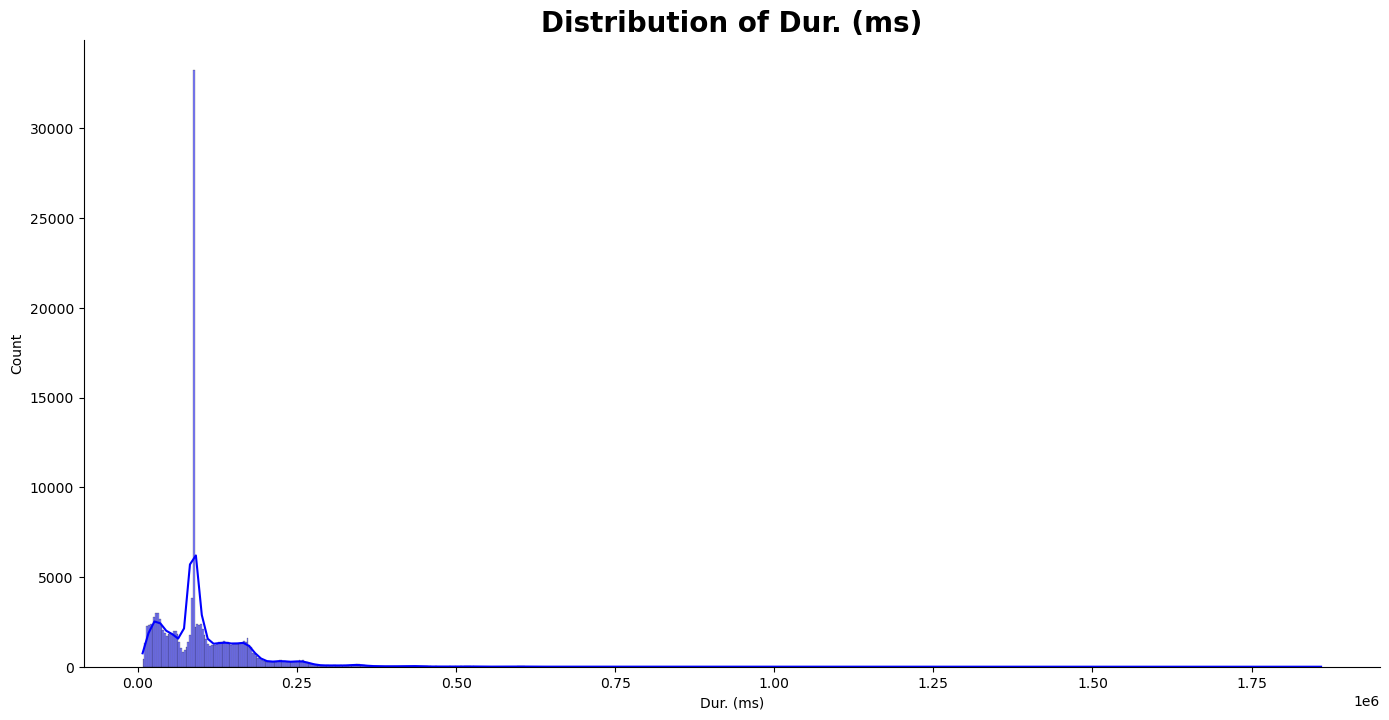

In [29]:
plot_hist(df_user_aggregation, 'Dur. (ms)', "blue")

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


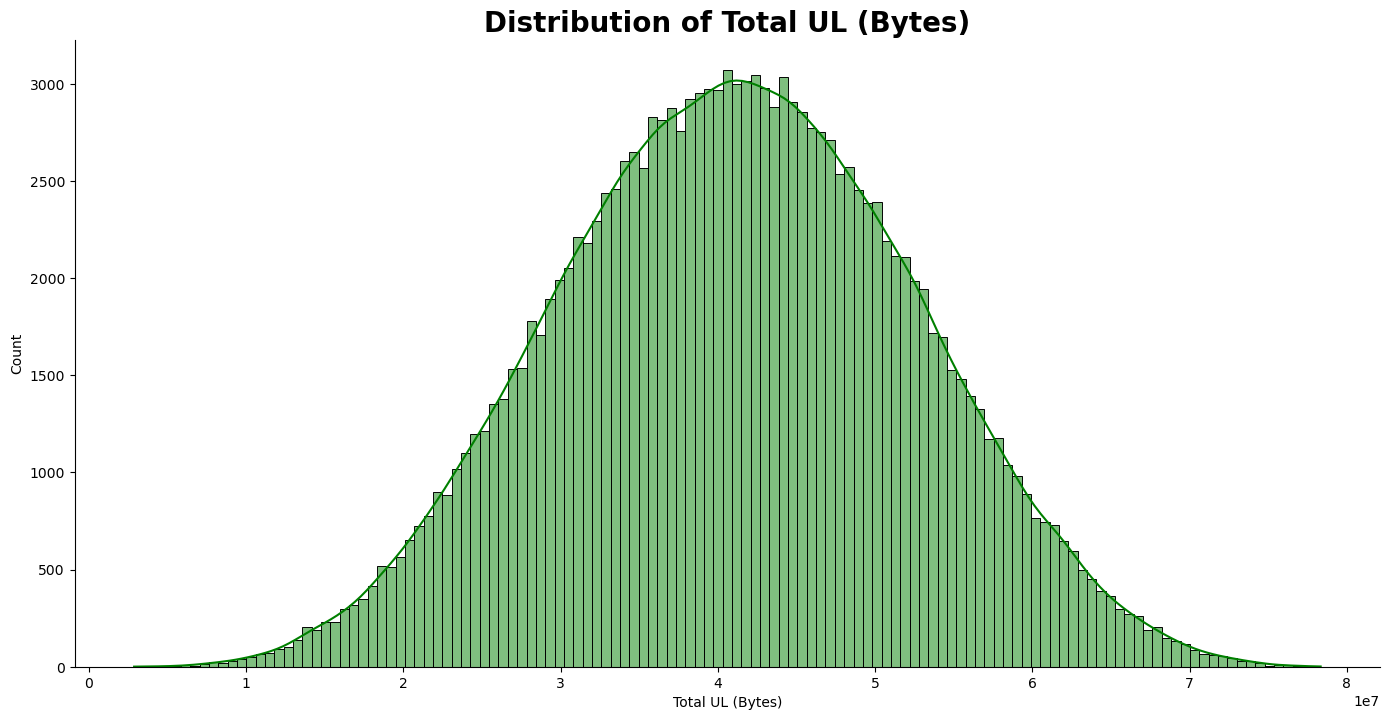

In [30]:
plot_hist(df_user_aggregation, "Total UL (Bytes)", "green")

In [31]:
df_user_aggregation['Total UL (Bytes)'].describe()

count    1.500010e+05
mean     4.112113e+07
std      1.127639e+07
min      2.866892e+06
25%      3.322196e+07
50%      4.114324e+07
75%      4.903424e+07
max      7.833131e+07
Name: Total UL (Bytes), dtype: float64

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


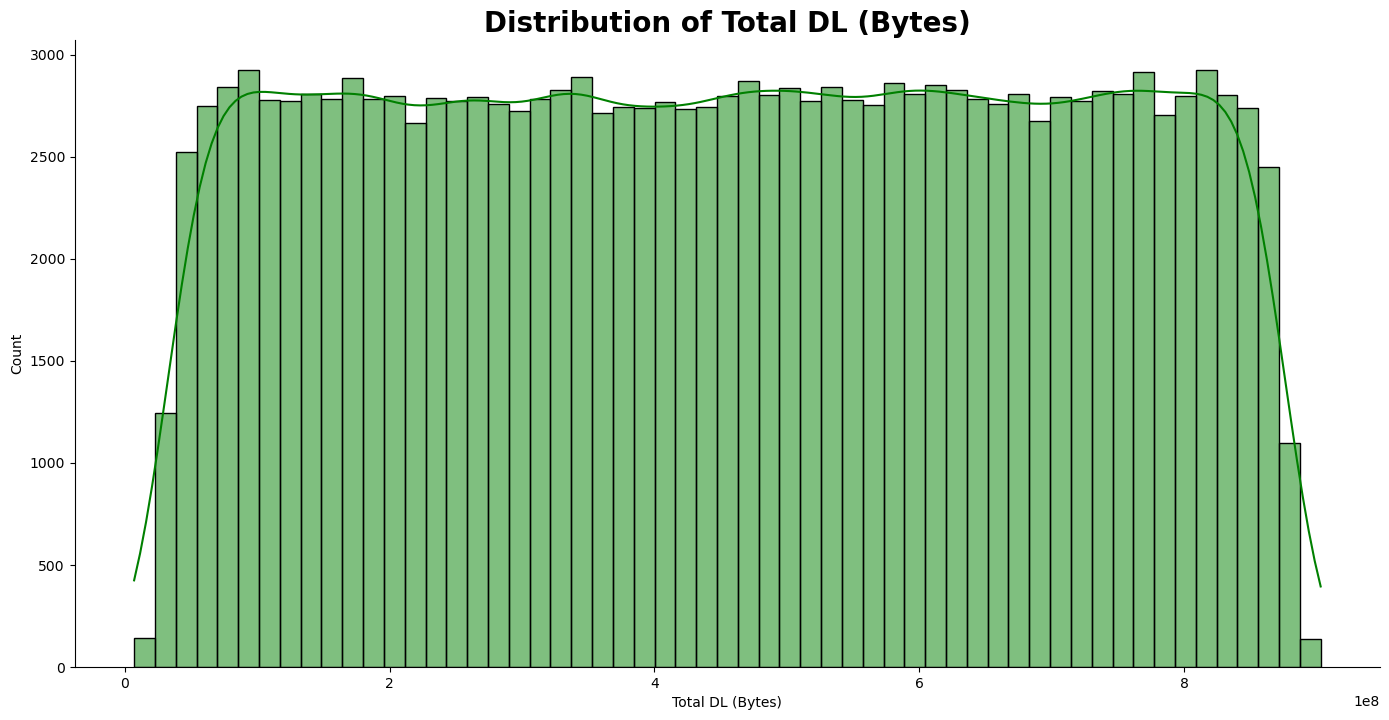

In [32]:
plot_hist(df_user_aggregation, "Total DL (Bytes)", "green")

In [33]:
df_user_aggregation['Total UL (Bytes)'].describe()

count    1.500010e+05
mean     4.112113e+07
std      1.127639e+07
min      2.866892e+06
25%      3.322196e+07
50%      4.114324e+07
75%      4.903424e+07
max      7.833131e+07
Name: Total UL (Bytes), dtype: float64

# Multivariate Analysis

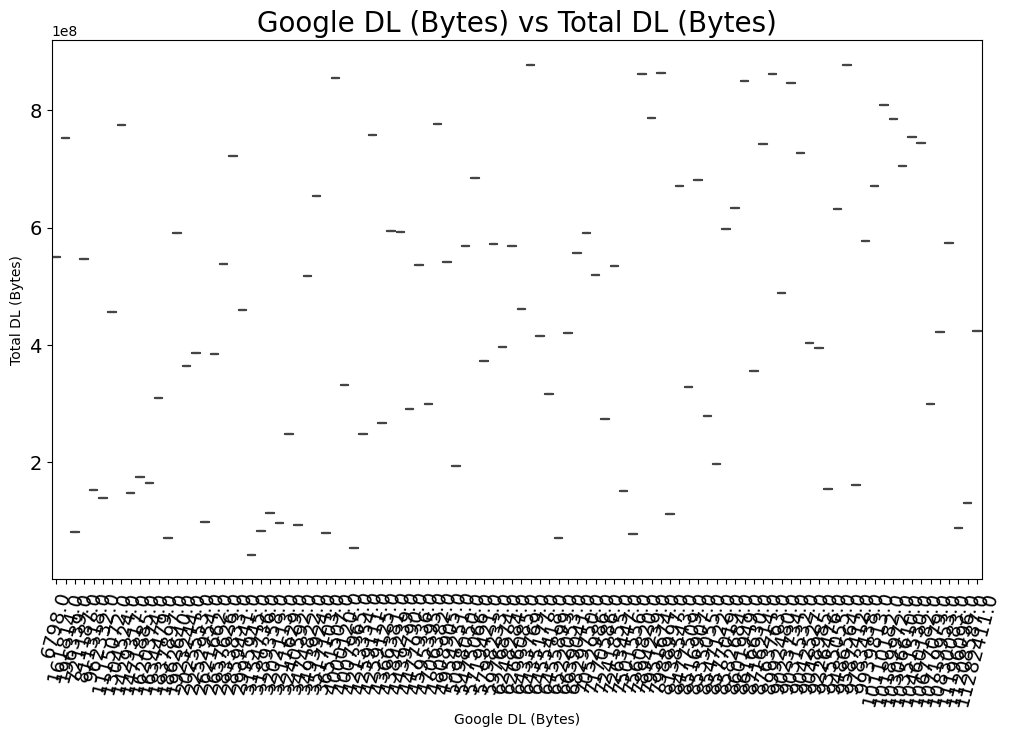

In [38]:
plot_box_multi(df_user_aggregation.head(100), x_col="Google DL (Bytes)", y_col="Total DL (Bytes)", title="Google DL (Bytes) vs Total DL (Bytes)")

In [39]:
columns_1 = ['Total UL (Bytes)', 'Social Media UL (Bytes)','Google UL (Bytes)','Email UL (Bytes)','Youtube UL (Bytes)',
           'Netflix UL (Bytes)','Gaming UL (Bytes)']
columns_2 = ['Total DL (Bytes)', 'Social Media DL (Bytes)','Google DL (Bytes)', 'Email DL (Bytes)', 'Youtube DL (Bytes)',
           'Netflix DL (Bytes)','Gaming DL (Bytes)', 'Other DL (Bytes)']

In [45]:
pair_UL = df_user_aggregation[columns_1]
pair_DL = df_user_aggregation[columns_2]

In [ ]:
sns.pairplot(pair_UL, hue = 'Total UL (Bytes)', diag_kind = 'kde',
             plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'},
             height=4)

In [ ]:
sns.pairplot(pair_DL, hue = 'Total DL (Bytes)', diag_kind = 'kde',
             plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'},
             height=4)

# Task 3 - User Engagement analysis

In [78]:

#df_clean['MSISDN/Number','Dur. (ms)'].value_counts().head(10)
task_3_df = df_clean[['Bearer Id','Dur. (ms)', 'MSISDN/Number', 'Social Media DL (Bytes)','Social Media UL (Bytes)','Google DL (Bytes)',
           'Google UL (Bytes)','Email DL (Bytes)','Email UL (Bytes)','Youtube DL (Bytes)','Youtube UL (Bytes)',
           'Netflix DL (Bytes)','Netflix UL (Bytes)','Gaming DL (Bytes)','Gaming UL (Bytes)','Other DL (Bytes)',
           'Total UL (Bytes)','Total DL (Bytes)']]
task_3_df.head()

,Bearer Id,Dur. (ms),MSISDN/Number,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,1823652.0,3.366496e+10,1545765.0,24420.0,1634479.0,1271433.0,3563542.0,137762.0,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,36749741.0,308879636.0
1,1.311448e+19,1365104.0,3.368185e+10,1926113.0,7165.0,3493924.0,920172.0,629046.0,308339.0,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,53800391.0,653384965.0
2,1.311448e+19,1361762.0,3.376063e+10,1684053.0,42224.0,8535055.0,1694064.0,2690151.0,672973.0,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,27883638.0,279807335.0
3,1.311448e+19,1321509.0,3.375034e+10,644121.0,13372.0,9023734.0,2788027.0,1439754.0,631229.0,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,43324218.0,846028530.0
4,1.311448e+19,1089009.0,3.369980e+10,862600.0,50188.0,6248284.0,1500559.0,1936496.0,173853.0,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,38542814.0,569138589.0


Text(0.5, 1.0, 'User engagement by ID')

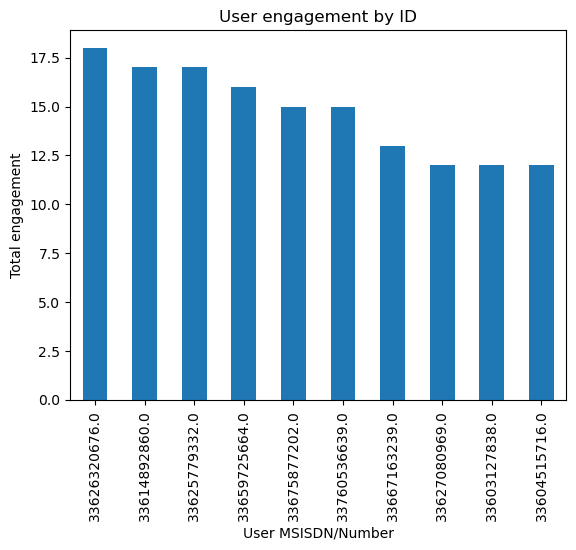

In [88]:
# Aggregate the above metrics per customer id (MSISDN)
top_10_t3 = task_3_df['MSISDN/Number'].value_counts(ascending=False)

# Plotting top 10
top_10_t3.iloc[:10].plot(kind="bar")
plt.xlabel("User MSISDN/Number")
plt.ylabel("Total engagement")
plt.title("User engagement by ID")

In [141]:
minmax_scaler = MinMaxScaler()

# generate 1000 data points randomly drawn from an exponential distribution
original_data = pd.DataFrame(np.random.exponential(200, size=150001))

original_data.sample(3)

,0
12232,78.236578
100904,97.744655
146346,291.591388


In [145]:
# mix-max scale the data between 0 and 1
def scaler(df):
    scaled_data = minmax_scaler.fit_transform(df)

    # plot both together to compare
    fig, ax = plt.subplots(1,2, figsize=(10, 6))
    sns.histplot(original_data, ax=ax[0])
    ax[0].set_title("Original Data")
    sns.histplot(scaled_data, ax=ax[1])
    ax[1].set_title("Scaled data")

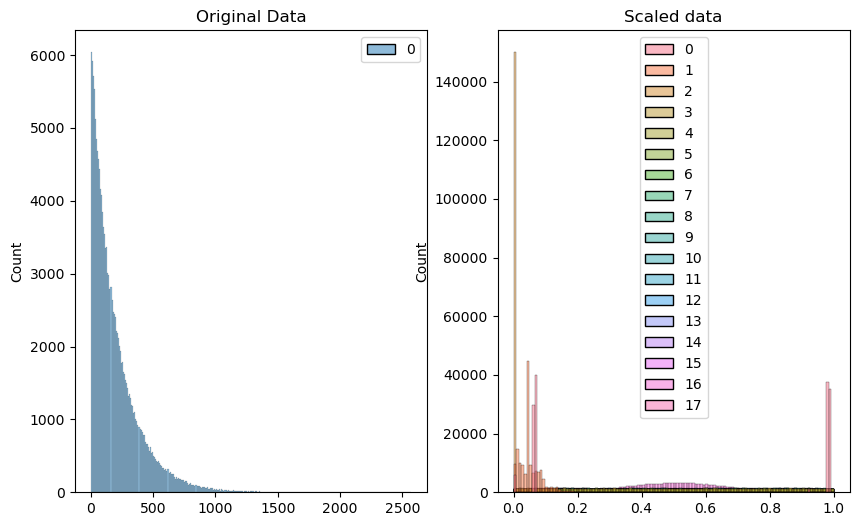

In [146]:
scaler(task_3_df)